<blockquote>Tomek links are 2 samples from a different class and are nearest neighbours to each other.


This procedure from `Imbalanced-Learn` removes either a sample from the majority class, or both observations including one from the minority class.</blockquote>

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import TomekLinks

plt.style.use("dark_background")

%matplotlib inline

---

## Create Data

In [2]:
def make_data(sep):
    
    # Returns arrays
    X, y = make_classification(
        n_samples= 1000,
        n_features = 2,
        n_redundant=0,
        n_clusters_per_class = 1,
        weights= [0.99],
        class_sep= sep,
        random_state = 10
    )
    
    # Transform arrays into pandas dataframe and series
    X = pd.DataFrame(X, columns = ["varA", "varB"])
    y = pd.Series(y)

    return X, y

0    985
1     15
Name: count, dtype: int64


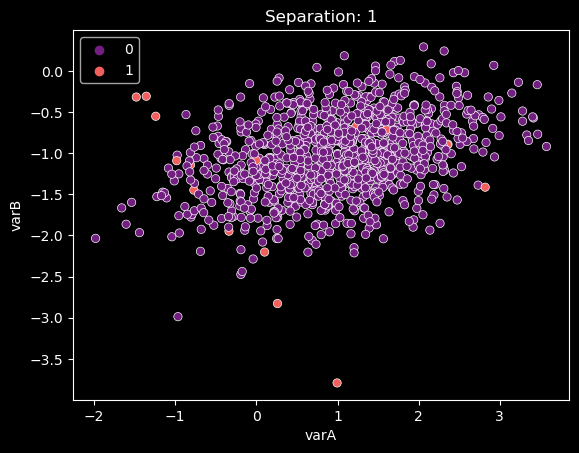

0    985
1     15
Name: count, dtype: int64


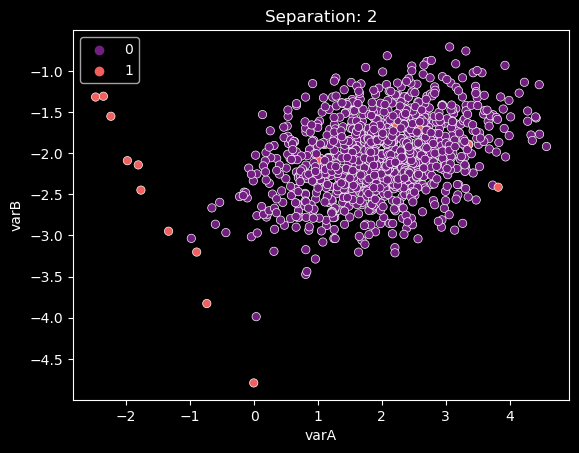

0    985
1     15
Name: count, dtype: int64


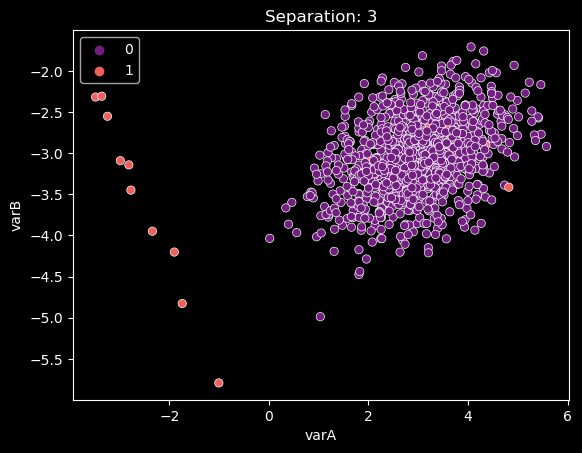

In [6]:
# create datasets with different class separatedness and plot

for sep in range(1,4):
    X, y = make_data(sep)
    
    print(y.value_counts())
    
    sns.scatterplot(
        data= X, 
        x = "varA",
        y = "varB",
        palette = "magma",
        hue = y
    )
    plt.title("Separation: {}".format(sep))
    plt.show();

## Under-sample utilizing Tomek Links

[TomekLinks](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html)

### **Well separated classes**

In [14]:
# create data

X, y = make_data(sep=2)

# set up Tomek Links

tl = TomekLinks(
    sampling_strategy='auto',  # undersamples only the majority class
    n_jobs=6
    )

X_resampled, y_resampled = tl.fit_resample(X, y)

In [15]:
# size of the unsampled dataset

X.shape, y.shape

((1000, 2), (1000,))

In [16]:
# size of the under-sampled dataset
X_resampled.shape, y_resampled.shape

((996, 2), (996,))

In [17]:
# display of class imbalance
y.value_counts()

0    985
1     15
Name: count, dtype: int64

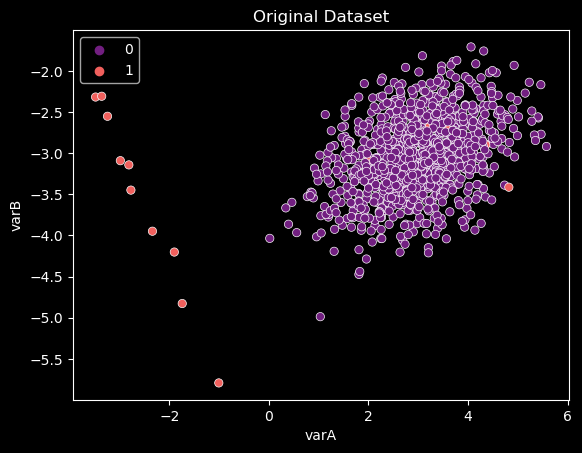

In [24]:
sns.scatterplot(
    data = X,
    x = "varA",
    y = "varB",
    palette= "magma",
    hue = y 
)
plt.title("Original Dataset");

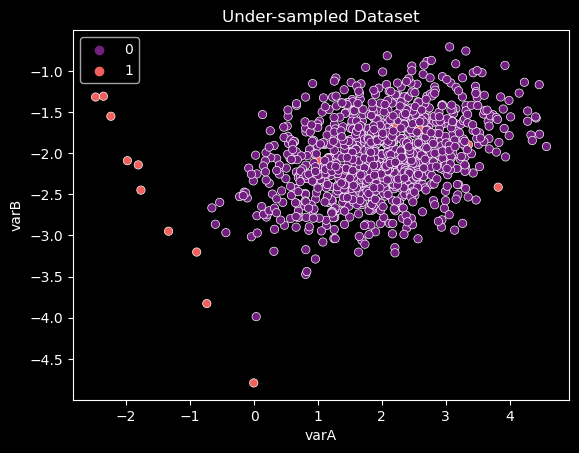

In [26]:
# plot undersampled dataset

sns.scatterplot(
    data = X_resampled,
    x = "varA",
    y = "varB",
    palette= "magma",
    hue = y_resampled
)
plt.title("Under-sampled Dataset");

<blockquote>The plots are essentially the same as only 4 samples were removed.</blockquote>

### Partially separated classes

In [30]:
# create data
X, y = make_data(sep=0.5)

# set up Tomek Links

tl = TomekLinks(
    sampling_strategy='auto',  # undersamples only the majority class
    n_jobs=6)  # I have 4 cores in my laptop

X_resampled, y_resampled = tl.fit_resample(X, y)

In [31]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [32]:
# undersampled data

X_resampled.shape, y_resampled.shape

((996, 2), (996,))

### Removing observations from both classes

In [33]:
# removing observations from both classes

tl = TomekLinks(
    sampling_strategy='all',  # undersamples only the majority class
    n_jobs=6)  # I have 4 cores in my laptop

X_resampled, y_resampled = tl.fit_resample(X, y)

In [34]:
# undersampled data with removal of both tomek links

X_resampled.shape, y_resampled.shape

((992, 2), (992,))

---